In [148]:
import pandas as pd
import numpy as np
from math import log2
import statistics as st
import matplotlib.pyplot as mp
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
# import warnings
# warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [129]:
'''
A1. For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you'd select for constructing
the decision tree. Use Information Gain as the impurity measure to identify the root node.
'buys_computer' is the class label.
'''
dataset= {
    'age':['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income':['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student':['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating':['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer':['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
}
df = pd.DataFrame(dataset)
count_buy=df['buys_computer'].value_counts()
length=len(df['buys_computer'])
count_buy=count_buy.tolist()
# print(count_buy)
yes_count=count_buy[0]
yes_p=yes_count/length
no_count=count_buy[1]
no_p=no_count/length
entropy_buys= -(yes_p*log2(yes_p))-(no_p*log2(no_p))
print("Entropy of buys_computer= ", entropy_buys)

Entropy of buys_computer=  0.9402859586706311


In [150]:
df_yes=df[df['buys_computer'] == "yes"]
buy_yes = len(df_yes)
df_no=df[df['buys_computer'] == "no"]
buy_no = len(df_no)

p=[]
entropy_cols=[]
IG=[]
for i in df.columns[0:-1]:
    print("Column:",i,":")
    count_i= list(df[i].value_counts())
    entropy_i=[]
    unique_elements=df[i].unique()
    entropy_j=[]
    for j in unique_elements:
        jyes = len(df_yes[df_yes[i]==j])
        jno = len(df_no[df_no[i]==j])
        # print("yes count for",j," = ",jyes)
        # print("no count for",j," = ",jno)
        jtotal = df[i].value_counts()[j]
        # print("total count for",j," = ",jtotal)
        p_yes= jyes / jtotal
        p_no= jno / jtotal
        if(p_no!=0 and p_yes!=0):
            if(p_no==1 and p_yes==1):
                ent_temp= 0
            else:
                ent_temp= -p_yes*np.log2(p_yes) - p_no*np.log2(p_no)
        elif(p_no!=0 and p_yes==0):
            if(p_no==1):
                ent_temp= 0
            else:
                ent_temp= -p_no*np.log2(p_no)
        elif(p_no==0 and p_yes!=0):
            if(p_yes==1):
                ent_temp= 0
            else:
                ent_temp= -p_yes*np.log2(p_yes)
        elif():
            ent_temp= 0
        # print("E(",j,") : ",ent_temp,sep='')
        entropy_j.append(ent_temp)
    for x in range(0,len(unique_elements)):
        el=unique_elements[x]
        valuee=(df[i].value_counts()[el]/length)*(entropy_j[x])
        entropy_i.append(valuee)
        
    print("\nentropy =",sum(entropy_i),sep='')
    entropy_cols.append(sum(entropy_i))
    IG_i = entropy_buys-sum(entropy_i)
    print("information gain = ",IG_i,"\n",sep='')
    IG.append(IG_i)

col_maxig = IG.index(max(IG))
colname=df.columns[col_maxig]
print("Since highest information gain is obtained by",colname," we choose it as the first column to use for constructing decision tree.")


Column: age :

entropy =0.6935361388961918
information gain = 0.24674981977443933

Column: income :

entropy =0.9110633930116763
information gain = 0.02922256565895487

Column: student :

entropy =0.7884504573082896
information gain = 0.15183550136234159

Column: credit_rating :

entropy =0.8921589282623617
information gain = 0.04812703040826949

Since highest information gain is obtained by age  we choose it as the first column to use for constructing decision tree.


In [147]:
'''
A2. Create a Decision Tree for the above data. Get the depth of the constructed tree.
model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X,Tr_y)
model.score(Tr_X, Tr_y)#Training Set accuracy
print(model.get_depth())#print the tree depth
'''
label_encoders = {}
categorical_columns = ['age', 'income', 'student', 'credit_rating']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
X = df.drop(columns=['buys_computer'])
Y = df['buys_computer']  
Tr_X, Te_X, Tr_Y, Te_Y = train_test_split(X, Y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_Y)
training_accuracy = model.score(Tr_X, Tr_Y)

print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

# prediction = model.predict([[2, 1, 1, 2]])
# print(prediction[0])

Training Set Accuracy: 1.0
Tree Depth: 5


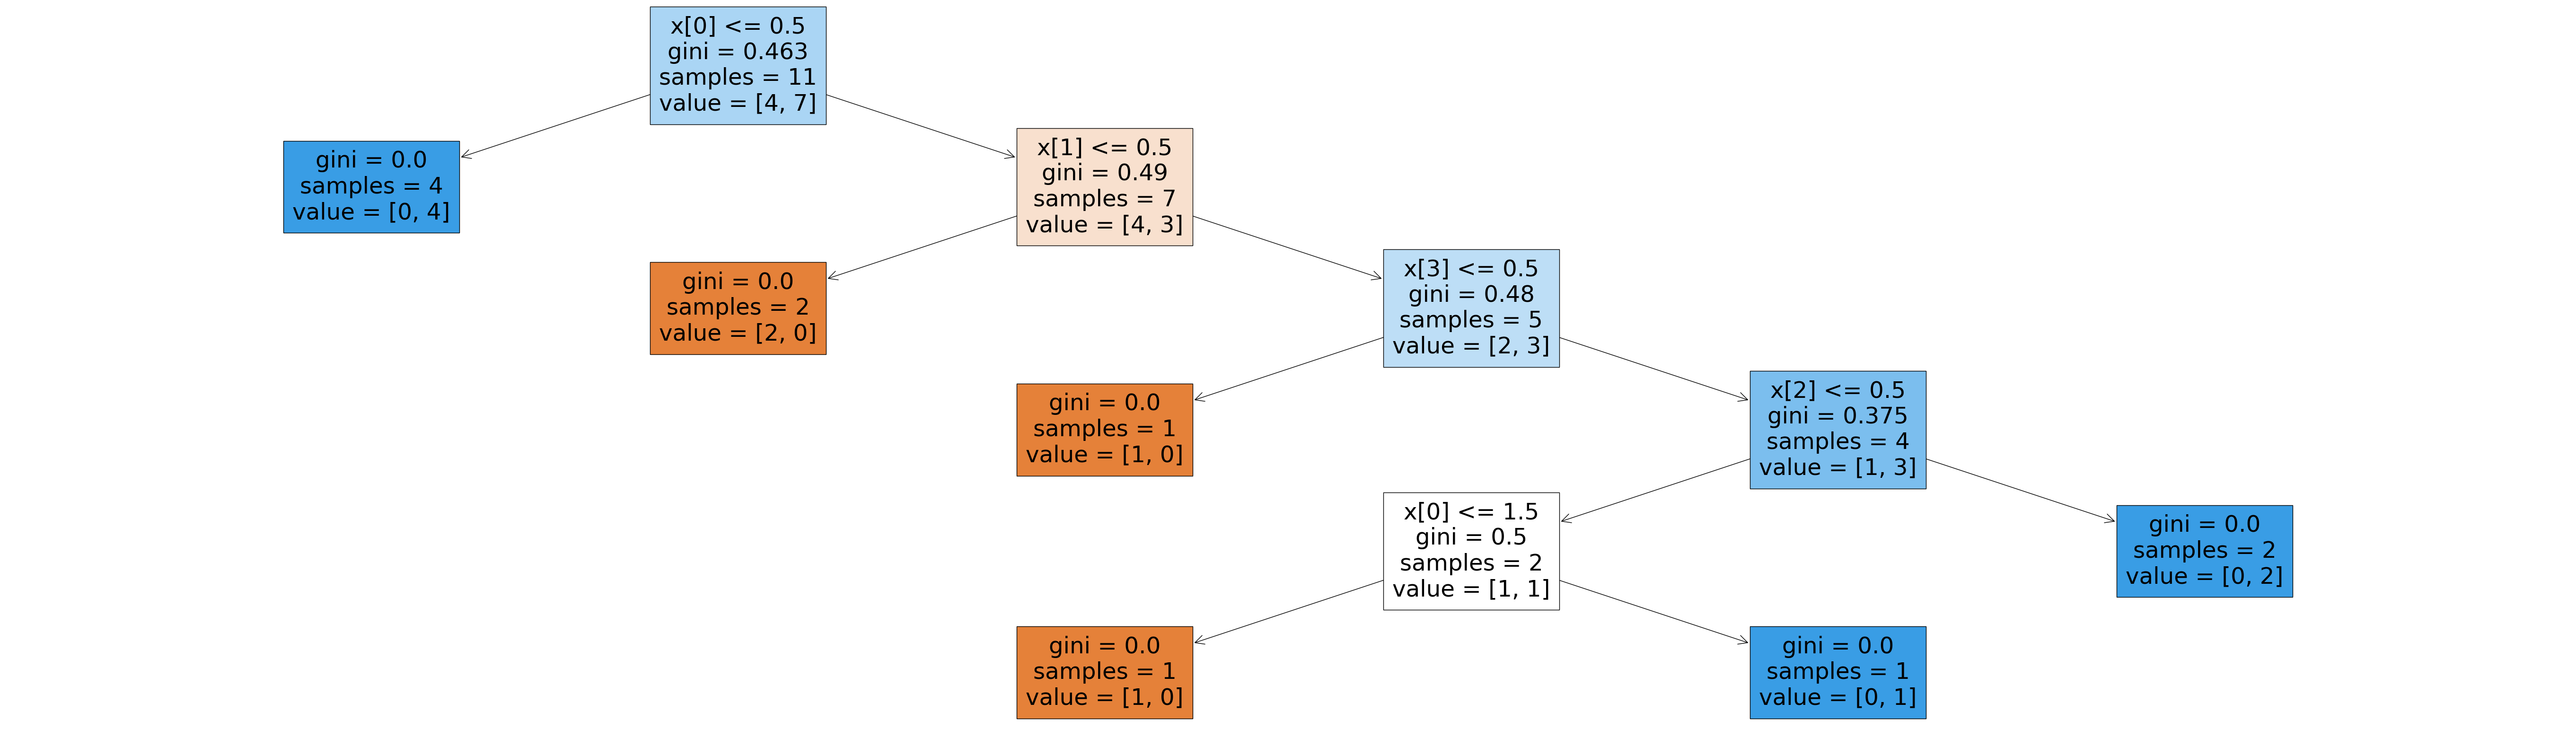

In [149]:
'''
A3. Visualize the constructed tree with plot_tree() command.
'''
mp.figure(figsize=(70, 20))
plot_tree(model, filled=True)
mp.show()

Training Set Accuracy: 1.0
Tree Depth: 5


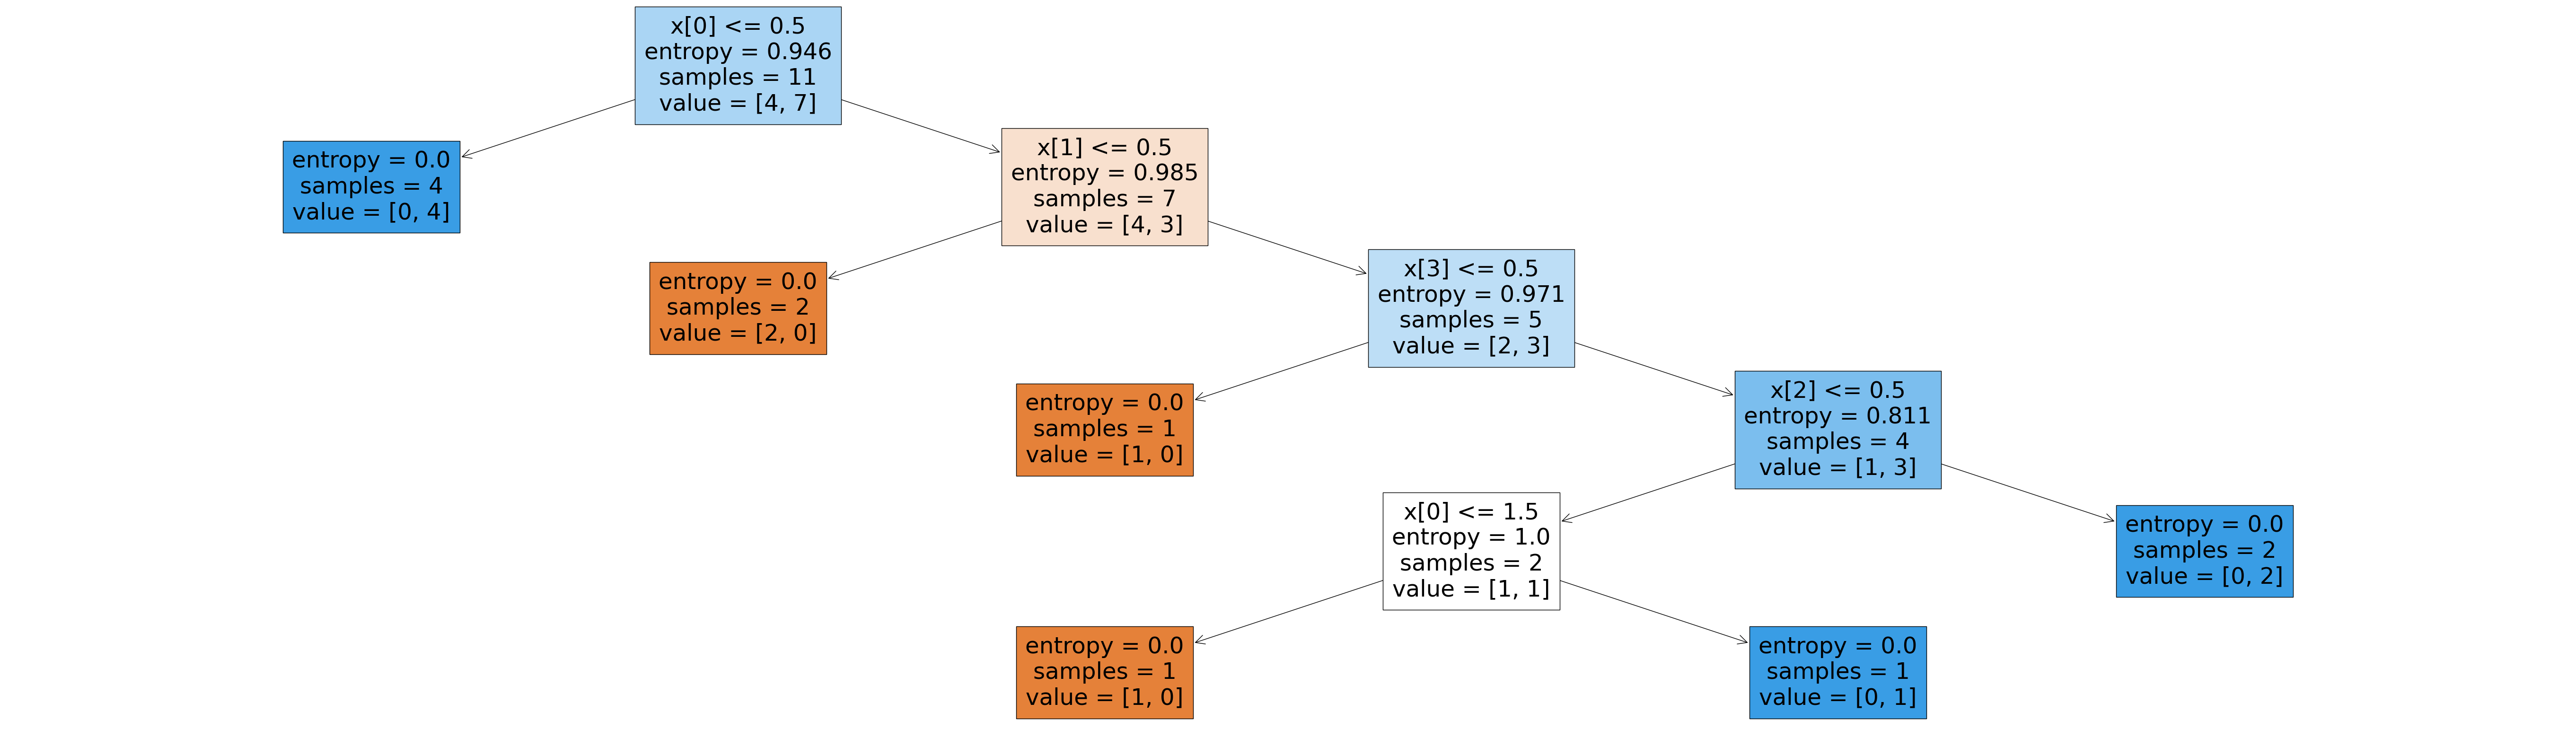

In [152]:
#decision tree using entropy
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_Y)
training_accuracy = model_entropy.score(Tr_X, Tr_Y)

print("Training Set Accuracy:", training_accuracy)
tree_depth = model_entropy.get_depth()
print("Tree Depth:", tree_depth)
mp.figure(figsize=(70, 20))
plot_tree(model_entropy, filled=True)
mp.show()